## Here we find the PMF and CDF of sum of  two dice

### Probablity Mass function(PMF)

In [2]:
import numpy as np
import pandas as pd
import random

In [12]:
l = []
for i in range(10000):
    a = random.randint(1,6)
    b = random.randint(1,6)
    l.append(a+b)

In [13]:
len(l)

10000

In [14]:
l[:5]

[7, 6, 9, 10, 7]

In [15]:
s = (pd.Series(l).value_counts()/pd.Series(l).value_counts().sum()).sort_index() #pd.Series basically lable the data 

In [16]:
np.cumsum(s) # it returns the cummulative sum 

2     0.0261
3     0.0809
4     0.1652
5     0.2740
6     0.4158
7     0.5808
8     0.7222
9     0.8310
10    0.9131
11    0.9692
12    1.0000
Name: count, dtype: float64

In [19]:
import matplotlib

<Axes: >

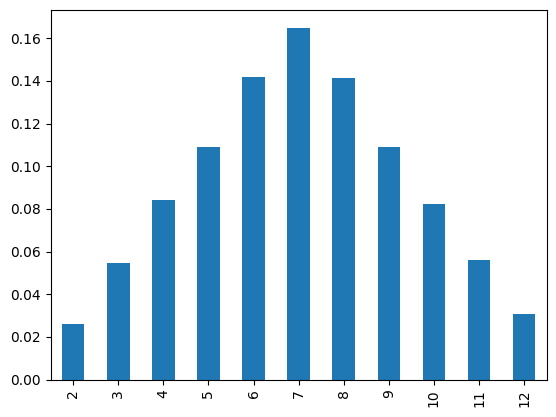

In [20]:
s.plot(kind='bar')

### Cummulative graph

<Axes: >

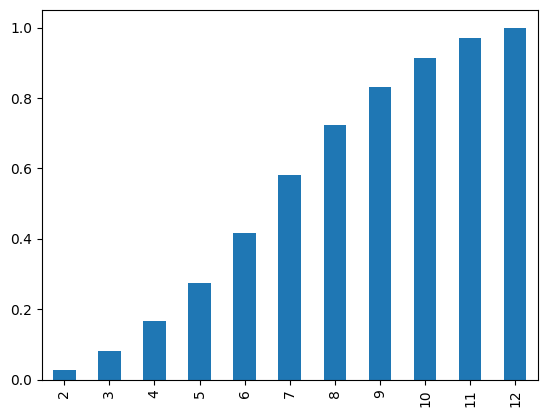

In [21]:
np.cumsum(s).plot(kind='bar')

## Parametric Estimation Function

In [24]:
import matplotlib.pyplot as plt
from numpy.random import normal

sample = normal(loc=50,scale = 5,size=10000) # loc means mean,scale means Standard deviation

In [25]:
sample.mean()

50.03540117976151

(array([  27.,  211.,  839., 2030., 2908., 2398., 1184.,  342.,   55.,
           6.]),
 array([32.7732942 , 36.47589165, 40.17848909, 43.88108653, 47.58368397,
        51.28628141, 54.98887885, 58.69147629, 62.39407374, 66.09667118,
        69.79926862]),
 <BarContainer object of 10 artists>)

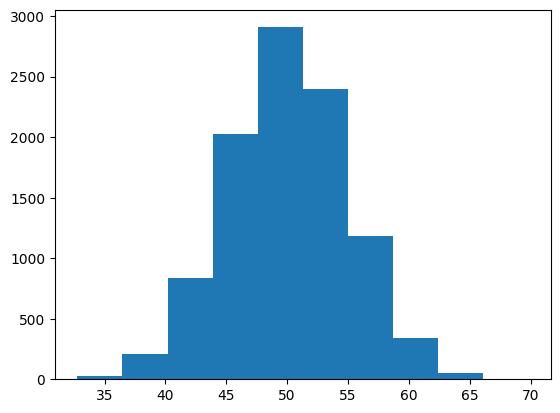

In [26]:
plt.hist(sample,bins=10) # histogram plat to visulize the distribution of data

# here we can see that we can apply normal probablity distribution

In [27]:
sample_mean = sample.mean() # here we calculate mean
sample_standard_deviation = sample.std() # and here we calculate standart deviation

In [31]:
# fit the distribution from above parameters
from scipy.stats import norm
dist = norm(sample_mean,sample_standard_deviation)

In [34]:
values = np.linspace(sample.min(),sample.max(),100) #Return evenly spaced numbers over a specified interval

In [35]:
sample.max()

69.799268618159

In [36]:
probablities = [dist.pdf(values)for values in values]

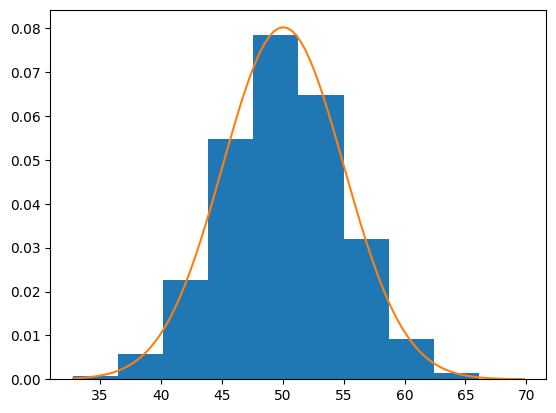

In [44]:
plt.hist(sample,bins=10,density=True)
plt.plot(values, probablities, label='PDF')

Alogrithm:-

STEP 1:- We draw a historgram and analysis which probablity density will be match.

STEP 2:- We calculate all parameters of that PD ( like here we have normal PD so we calculate mean and Standard Deviation.

Step 3:- put the value of x one-by-one and draw the line you will get PDE of that sample.

## KDE

In [46]:
sample1 = normal(loc=20,scale=5,size=300)
sample2 = normal(loc=40,scale=5,size=700)
sample = np.hstack((sample1,sample2))

In [47]:
sample

array([23.21394476, 18.38981495, 19.56457398, 16.2674149 ,  8.235381  ,
       14.34743851, 18.54189377, 18.91214475, 15.89840336, 20.67932009,
       13.83550628, 19.83857532, 26.54457131, 21.40537258, 11.08922501,
       20.86094031, 27.37864975, 15.20938333, 15.68588654, 10.24841071,
       20.72672111, 14.74293844, 21.66019147, 13.99245755, 15.9529937 ,
       30.20584581, 22.35903667, 18.47693712, 29.22403088, 23.73402529,
       20.23455438, 16.95347388, 18.28774928, 16.66683627, 25.2394168 ,
       23.84064761, 16.08202598, 14.95255515, 29.51289777, 22.44172524,
       21.8350938 , 17.63903301, 23.65596821, 12.9734067 , 15.99355594,
       26.35529008, 26.14017955, 22.19022448, 15.53215234, 25.66637789,
       28.00970575,  9.85979317, 21.58969833, 16.77043999, 23.11875377,
       30.54107812, 19.43667422, 15.89894963, 18.91972911, 11.3835984 ,
       14.82514492, 15.10572812, 25.6630957 , 22.47600479, 19.9254081 ,
       23.96490905, 19.03031818, 21.22500782, 23.00997793, 21.17

(array([ 2.,  2.,  2.,  2.,  2.,  4.,  7.,  8., 12., 12., 17., 25., 19.,
        21., 18., 20., 26., 23., 19., 19., 13., 10., 10., 11., 10., 10.,
        10., 18., 18., 21., 40., 44., 49., 63., 53., 44., 57., 48., 49.,
        35., 33., 30., 23., 13., 14.,  7.,  2.,  3.,  1.,  1.]),
 array([ 4.88325358,  5.87800374,  6.87275389,  7.86750405,  8.86225421,
         9.85700437, 10.85175452, 11.84650468, 12.84125484, 13.836005  ,
        14.83075516, 15.82550531, 16.82025547, 17.81500563, 18.80975579,
        19.80450594, 20.7992561 , 21.79400626, 22.78875642, 23.78350657,
        24.77825673, 25.77300689, 26.76775705, 27.7625072 , 28.75725736,
        29.75200752, 30.74675768, 31.74150783, 32.73625799, 33.73100815,
        34.72575831, 35.72050846, 36.71525862, 37.71000878, 38.70475894,
        39.6995091 , 40.69425925, 41.68900941, 42.68375957, 43.67850973,
        44.67325988, 45.66801004, 46.6627602 , 47.65751036, 48.65226051,
        49.64701067, 50.64176083, 51.63651099, 52.63126114,

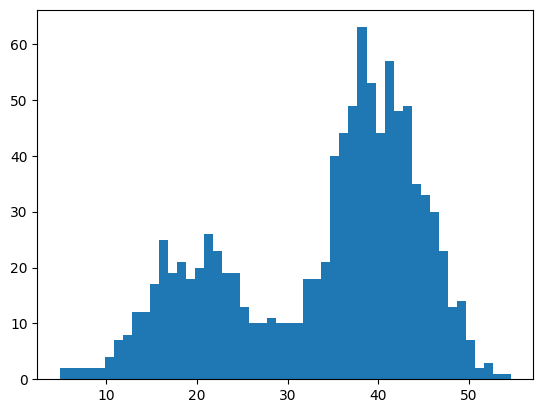

In [48]:
plt.hist(sample,bins=50) # So,here we can see that there is no any PD viewing 

In [49]:
from sklearn.neighbors import KernelDensity

In [60]:
model = KernelDensity(bandwidth=3,kernel='gaussian')

sample = sample.reshape((len(sample),1))
model.fit(sample)

KernelDensity(bandwidth=3)

In [61]:
values = np.linspace(sample.min(),sample.max(),100)
values = values.reshape((len(values),1))

In [64]:
probablities = model.score_samples(values) #This method computes the log probability density of each data point in values under the KDE model.
probablities = np.exp(probablities) # here we apply exponiantial becouse score_samples give log-density estimate of the input samples values.

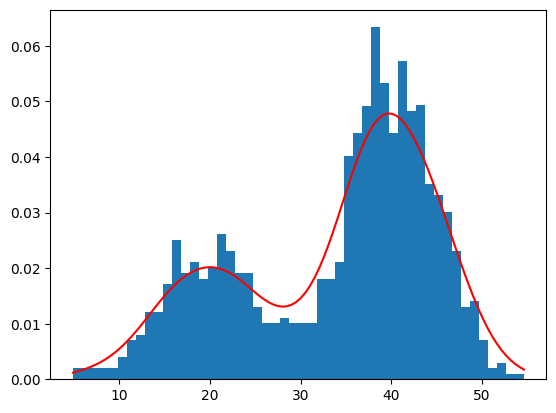

In [78]:
plt.hist(sample,bins=50,density=True)
plt.plot(values[:],probablities,color='red')

Alogrithm:-

STEP1:- We select model as KernelDensity

STEP2:- We select a PD(mostly used is gaussian).

In [ ]:
STEP3:- Convert our whole data into 2D.

In [ ]:
STEP4:- Computes the log probability density of each data point

In [ ]:
STEP5:- Plot the historgram and values alongwith

In [4]:
import seaborn as sns

In [5]:
df = sns.load_dataset('iris')

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1000)>